DataReader 사용하기

In [1]:
import pandas_datareader.data as web
import datetime

web에서 주가 데이터 불러오기

In [2]:
start = datetime.datetime(2016, 2, 19)
end = datetime.datetime(2016, 3, 4)
gs =web.DataReader("078930.KS", "yahoo", start, end)
gs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,51100,49950,50300,50600,301800,42082.011719
2016-02-22,50800,49850,50300,50400,153961,41915.683594
2016-02-23,53000,50800,50800,52800,431934,43911.664062
2016-02-24,53500,51900,52000,53500,259616,44493.824219
2016-02-25,54700,52700,53900,53900,170839,44826.488281
2016-02-26,54500,53200,54300,53300,159453,44327.496094
2016-02-29,53900,52800,53000,53000,154692,44077.996094
2016-03-02,55200,53500,53900,55100,229999,45824.488281
2016-03-03,55800,54300,55300,55000,217063,45741.312500


In [3]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2016-02-19 to 2016-03-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       10 non-null     int64  
 1   Low        10 non-null     int64  
 2   Open       10 non-null     int64  
 3   Close      10 non-null     int64  
 4   Volume     10 non-null     int64  
 5   Adj Close  10 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 560.0 bytes


In [4]:
gs = web.DataReader("078930.KS", "yahoo")

In [5]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1221 entries, 2016-04-20 to 2021-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1221 non-null   float64
 1   Low        1221 non-null   float64
 2   Open       1221 non-null   float64
 3   Close      1221 non-null   float64
 4   Volume     1221 non-null   float64
 5   Adj Close  1221 non-null   float64
dtypes: float64(6)
memory usage: 66.8 KB


In [ ]:
수정된 종가 그리기

In [7]:
import matplotlib.pyplot as plt

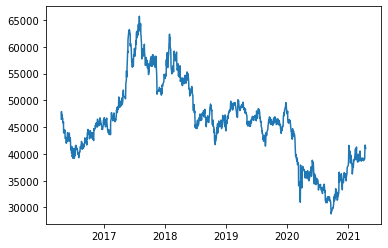

In [10]:
plt.plot(gs['Adj Close'])
plt.show()

In [12]:
# Get GS Data from Yahoo
gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2021-03-06")

In [13]:
gs.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-26,39400.0,38550.0,39000.0,39000.0,607906.0,39000.0
2021-03-02,39850.0,38300.0,39800.0,38500.0,573951.0,38500.0
2021-03-03,39100.0,38300.0,38400.0,39100.0,297223.0,39100.0
2021-03-04,39500.0,38600.0,38900.0,38850.0,342738.0,38850.0
2021-03-05,39450.0,38350.0,39000.0,38550.0,451865.0,38550.0


In [ ]:
5일 주가이동평균 칼럼 추가하기

In [16]:
ma5 = gs['Adj Close'].rolling(window=5).mean()
ma5.tail(10)

Date
2021-02-19    39960.0
2021-02-22    40170.0
2021-02-23    40390.0
2021-02-24    40100.0
2021-02-25    40140.0
2021-02-26    40150.0
2021-03-02    39650.0
2021-03-03    39210.0
2021-03-04    39080.0
2021-03-05    38800.0
Name: Adj Close, dtype: float64

In [19]:
gs.insert(len(gs.columns), "MA5", ma5)
gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA5
Date,,,,,,,
2021-02-26,39400.0,38550.0,39000.0,39000.0,607906.0,39000.0,40150.0
2021-03-02,39850.0,38300.0,39800.0,38500.0,573951.0,38500.0,39650.0
2021-03-03,39100.0,38300.0,38400.0,39100.0,297223.0,39100.0,39210.0
2021-03-04,39500.0,38600.0,38900.0,38850.0,342738.0,38850.0,39080.0
2021-03-05,39450.0,38350.0,39000.0,38550.0,451865.0,38550.0,38800.0


In [ ]:
20일, 60일, 120일 주가이동평균 칼럼에 추가

In [20]:
# Moving average
ma20 = gs['Adj Close'].rolling(window=20).mean()
ma60 = gs['Adj Close'].rolling(window=60).mean()
ma120 = gs['Adj Close'].rolling(window=120).mean()

# Insert columns
gs.insert(len(gs.columns), "MA20", ma20)
gs.insert(len(gs.columns), "MA60", ma60)
gs.insert(len(gs.columns), "MA120", ma120)

In [21]:
gs.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2021-02-26,39400.0,38550.0,39000.0,39000.0,607906.0,39000.0,40150.0,38962.5,37810.067448,35153.246175
2021-03-02,39850.0,38300.0,39800.0,38500.0,573951.0,38500.0,39650.0,39040.0,37896.584896,35215.511426
2021-03-03,39100.0,38300.0,38400.0,39100.0,297223.0,39100.0,39210.0,39182.5,37966.968359,35274.857292
2021-03-04,39500.0,38600.0,38900.0,38850.0,342738.0,38850.0,39080.0,39260.0,38027.641536,35333.307731
2021-03-05,39450.0,38350.0,39000.0,38550.0,451865.0,38550.0,38800.0,39282.5,38088.858333,35389.654134


주가이동평균선 그리기

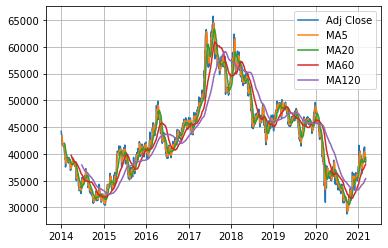

In [22]:
# Plot
plt.plot(gs.index, gs['Adj Close'], label="Adj Close")
plt.plot(gs.index, gs['MA5'], label="MA5")
plt.plot(gs.index, gs['MA20'], label="MA20")
plt.plot(gs.index, gs['MA60'], label="MA60")
plt.plot(gs.index, gs['MA120'], label="MA120")
plt.legend(loc='best')                             # 범례표시: loc='best': 적절한 위치에 자동 출력
plt.grid()                                         # 격자표시
plt.show()